# Content 


<a href="#Imports">1. Imports </a>

<a href="url">2. Load Data</a>

<a href="url">3. Data Formating</a>

<a href="url">4. Exploratory Data Analysis</a>

<a href="url">5. Data prep</a>

<a href="url">6. Experimentations</a>

# <a> Imports </a>

In [289]:
import pandas as pd 
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics
import re


# <a> Load Data </a>

In [315]:
df=pd.read_csv('steam_discounts.csv').drop('Unnamed: 0',axis=1)

In [316]:
#formatting numerical values 
df['price']=df['price'].apply(lambda x : re.sub("[^0-9//.]", "", x))
df['rating']=df['rating'].apply(lambda x : re.sub("[^0-9//.]", "", x))
df['discount']=df['discount'].apply(lambda x : re.sub("[^0-9]", "", x))

In [317]:
df['discount'].replace('', None,inplace=True)
df['rating'].replace('', None,inplace=True)

In [318]:
df['price']=df['price'].astype(float)
df['rating']=df['rating'].astype(float)
df['discount']=df['discount'].astype(float)

In [319]:
df['discount']=df.apply(lambda row: float(row['discount']) * 0.01,axis=1)

In [320]:
df['op']=df.apply(lambda row: abs(row['price']/1-(row['discount']*100)),axis=1)

In [321]:
df.head()

,name,price,rating,dis_ends,dis_start,release,discount,op
0,Little Inferno\nnew historical low,2.99,91.28,in 3 days,4 hours ago,9 years ago,0.90,87.01
1,Human Resource Machine\nnew historical low,7.48,90.11,in 3 days,4 hours ago,6 years ago,0.75,67.52
2,HIVESWAP: ACT 1\nnew historical low,6.28,89.56,in 2 days,4 hours ago,4 years ago,0.65,58.72
3,7 Billion Humans\nnew historical low,7.48,88.34,in 3 days,4 hours ago,3 years ago,0.75,67.52
4,Pesterquest\nnew historical low,8.48,86.06,in 2 days,4 hours ago,2 years ago,0.66,57.52


# baseline model 

In [322]:
X=df[['rating','op']]#only numerical
y=df.discount

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [334]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [335]:
regressor.score(X_train, y_train)

0.8194440052825537

In [336]:
regressor.score(X_val, y_val)

0.8197733391363717

In [337]:
y_predicted=regressor.predict(X_test)

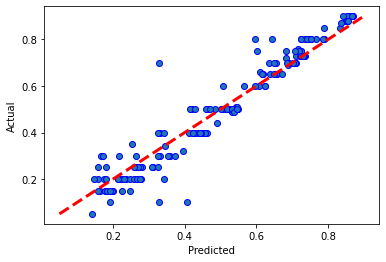

In [338]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

## checking results 

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df_res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_res

# Data Prep

In [94]:
df=pd.read_csv('steam_discounts.csv').drop('Unnamed: 0',axis=1)


In [95]:
df.head()

,name,price,rating,dis_ends,dis_start,release,discount
0,Little Inferno\nnew historical low,2.99 SR,91.28%,in 3 days,4 hours ago,9 years ago,-90%
1,Human Resource Machine\nnew historical low,7.48 SR,90.11%,in 3 days,4 hours ago,6 years ago,-75%
2,HIVESWAP: ACT 1\nnew historical low,6.28 SR,89.56%,in 2 days,4 hours ago,4 years ago,-65%
3,7 Billion Humans\nnew historical low,7.48 SR,88.34%,in 3 days,4 hours ago,3 years ago,-75%
4,Pesterquest\nnew historical low,8.48 SR,86.06%,in 2 days,4 hours ago,2 years ago,-66%


In [96]:
df.isna().sum()

name           0
price          0
rating         0
dis_ends     219
dis_start    219
release      219
discount       0
dtype: int64

In [97]:
df['release'].fillna(df['release'].mode(),inplace=True)

In [98]:
df['rating'].fillna(df['rating'].mode(),inplace=True)

In [99]:
df['dis_ends'].fillna(df['dis_ends'].mode(),inplace=True)

In [100]:
df['dis_start'].fillna(df['dis_start'].mode(),inplace=True)

In [101]:
df.isna().sum()

name           0
price          0
rating         0
dis_ends     219
dis_start    219
release      219
discount       0
dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       987 non-null    object
 1   price      987 non-null    object
 2   rating     987 non-null    object
 3   dis_ends   768 non-null    object
 4   dis_start  768 non-null    object
 5   release    768 non-null    object
 6   discount   987 non-null    object
dtypes: object(7)
memory usage: 54.1+ KB


# Data Formatting 

In [103]:
#formatting numerical values 
df['price']=df['price'].apply(lambda x : re.sub("[^0-9//.]", "", x))
df['rating']=df['rating'].apply(lambda x : re.sub("[^0-9//.]", "", x))
df['discount']=df['discount'].apply(lambda x : re.sub("[^0-9]", "", x))

In [104]:
df['discount'].replace('', None,inplace=True)
df['rating'].replace('', None,inplace=True)

In [105]:
df['price']=df['price'].astype(float)
df['rating']=df['rating'].astype(float)
df['discount']=df['discount'].astype(float)

In [106]:
df.head()

,name,price,rating,dis_ends,dis_start,release,discount
0,Little Inferno\nnew historical low,2.99,91.28,in 3 days,4 hours ago,9 years ago,90.0
1,Human Resource Machine\nnew historical low,7.48,90.11,in 3 days,4 hours ago,6 years ago,75.0
2,HIVESWAP: ACT 1\nnew historical low,6.28,89.56,in 2 days,4 hours ago,4 years ago,65.0
3,7 Billion Humans\nnew historical low,7.48,88.34,in 3 days,4 hours ago,3 years ago,75.0
4,Pesterquest\nnew historical low,8.48,86.06,in 2 days,4 hours ago,2 years ago,66.0


In [107]:
df['release'].fillna(df['release'].mode(),inplace=True)

In [108]:
df['dis_ends'].fillna(df['dis_ends'].mode(),inplace=True)

In [109]:
df['dis_start'].fillna(df['dis_start'].mode(),inplace=True)

In [131]:
df.isna().sum()

name           0
price          0
rating         0
dis_ends     219
dis_start    219
release      219
discount       0
recent       219
op             0
dtype: int64

In [134]:
df.dropna(inplace=True)

In [112]:
df['discount']=df.apply(lambda row: float(row['discount']) * 0.01,axis=1)

In [113]:
df.head()

,name,price,rating,dis_ends,dis_start,release,discount
0,Little Inferno\nnew historical low,2.99,91.28,in 3 days,4 hours ago,9 years ago,0.90
1,Human Resource Machine\nnew historical low,7.48,90.11,in 3 days,4 hours ago,6 years ago,0.75
2,HIVESWAP: ACT 1\nnew historical low,6.28,89.56,in 2 days,4 hours ago,4 years ago,0.65
3,7 Billion Humans\nnew historical low,7.48,88.34,in 3 days,4 hours ago,3 years ago,0.75
4,Pesterquest\nnew historical low,8.48,86.06,in 2 days,4 hours ago,2 years ago,0.66


In [114]:
df['name']=df.apply(lambda row: row['name'].split('\n')[0],axis=1)

In [115]:
df.head()

,name,price,rating,dis_ends,dis_start,release,discount
0,Little Inferno,2.99,91.28,in 3 days,4 hours ago,9 years ago,0.90
1,Human Resource Machine,7.48,90.11,in 3 days,4 hours ago,6 years ago,0.75
2,HIVESWAP: ACT 1,6.28,89.56,in 2 days,4 hours ago,4 years ago,0.65
3,7 Billion Humans,7.48,88.34,in 3 days,4 hours ago,3 years ago,0.75
4,Pesterquest,8.48,86.06,in 2 days,4 hours ago,2 years ago,0.66


# Feauter Engineering 

In [129]:
df['recent'].fillna(df['recent'].mode(),inplace=True)

In [119]:
df['op']=df.apply(lambda row: abs(row['price']/1-(row['discount']*100)),axis=1)

In [135]:
df['recent']=df.apply(lambda row: 0 if(('years' in row['recent']) and (int(row['recent'][0])>=4)) else 1,axis=1)

In [136]:
df.head()

,name,price,rating,dis_ends,dis_start,release,discount,recent,op
0,Little Inferno,2.99,91.28,in 3 days,4 hours ago,9 years ago,0.90,0,87.01
1,Human Resource Machine,7.48,90.11,in 3 days,4 hours ago,6 years ago,0.75,0,67.52
2,HIVESWAP: ACT 1,6.28,89.56,in 2 days,4 hours ago,4 years ago,0.65,0,58.72
3,7 Billion Humans,7.48,88.34,in 3 days,4 hours ago,3 years ago,0.75,1,67.52
4,Pesterquest,8.48,86.06,in 2 days,4 hours ago,2 years ago,0.66,1,57.52


In [138]:
df.drop(columns=['price'],inplace=True)

In [140]:
df.drop(columns=['release'],inplace=True)

# EDA

<AxesSubplot:>

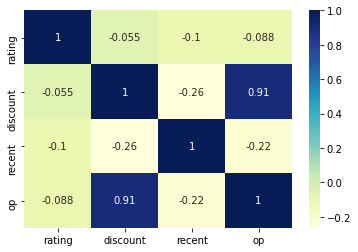

In [141]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True) 


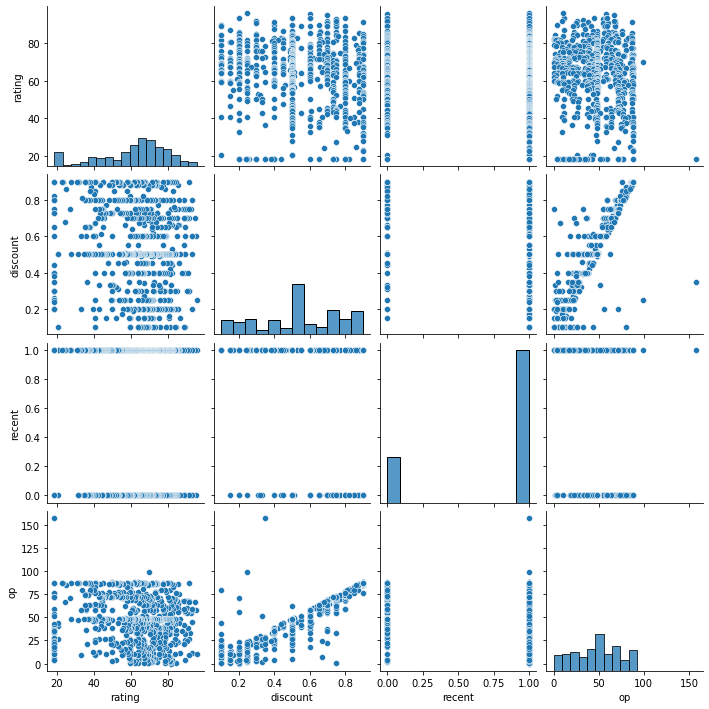

In [142]:
sns.pairplot(df)

<AxesSubplot:xlabel='discount'>

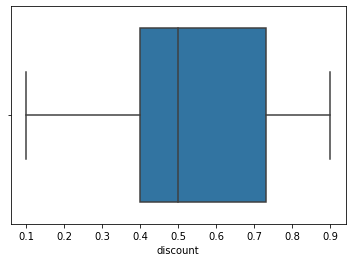

In [285]:
sns.boxplot(df['discount'])

/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='op'>

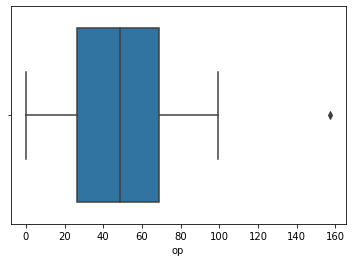

In [294]:
sns.boxplot(df['op'])

# Linear Regression Model

In [192]:
X=df[['rating','recent','op']]
y=df.discount

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=6)

In [381]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [382]:
regressor.score(X_train, y_train)

0.852887927206056

In [383]:
regressor.score(X_val, y_val)

0.8416817127810393

In [384]:
regressor.score(X_test, y_test)

0.8129831626287737

In [287]:
y_predicted=regressor.predict(X_test)

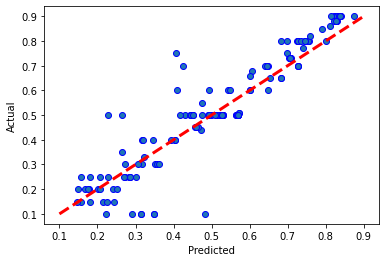

In [290]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()


In [295]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))


The model performance for testing set
--------------------------------------
MAE is 0.060509529749583284
MSE is 0.007502251015179731


In [339]:
df['discount'].describe()

count    987.000000
mean       0.528227
std        0.231439
min        0.050000
25%        0.400000
50%        0.500000
75%        0.730000
max        0.900000
Name: discount, dtype: float64

# Polynomial Regression Model

In [280]:
scaler = preprocessing.StandardScaler()
degree=5
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [281]:
polyreg_scaled.score(X_train, y_train)

0.8831594087907316

In [282]:
polyreg_scaled.score(X_val, y_val)

0.8352089022974507

In [283]:
polyreg_scaled.score(X_test, y_test)

0.8609110305976473

In [292]:
polyreg_y_pred=polyreg_scaled.predict(X_test)

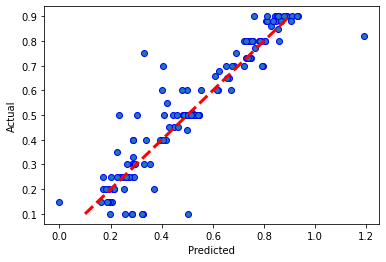

In [293]:
fig, ax = plt.subplots()
ax.scatter(polyreg_y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()


In [298]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, polyreg_y_pred)
mse = metrics.mean_squared_error(y_test, polyreg_y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))


The model performance for testing set
--------------------------------------
MAE is 0.05377827247125458
MSE is 0.008112178227070834
